The Four Assumptions of Linear Regression
Linear regression is a useful statistical method we can use to understand the relationship between two variables, x and y. However, before we conduct linear regression, we must first make sure that four assumptions are met:

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

If one or more of these assumptions are violated, then the results of our linear regression may be unreliable or even misleading.

In this post, we provide an explanation for each assumption, how to determine if the assumption is met, and what to do if the assumption is violated.

# important link

https://www.statology.org/linear-regression-assumptions/

https://www.kaggle.com/shrutimechlearn/step-by-step-assumptions-linear-regression

# There are four assumptions associated with a linear regression model:

Linearity: The relationship between X and the mean of Y is linear.

Homoscedasticity: The variance of residual is the same for any value of X.

Independence: Observations are independent of each other.

Normality: For any fixed value of X, Y is normally distributed.

y(x)=θ0 +θ1 x

difference between the actual value of the target and the predicted value is called the residual.

residual ε = y true − y pred

y true= y pred + ε

y true= y pred + ε = θ0 + θ1x + ε

Let's visualize this in a vector form

y true = [1  x] × [θ0] + [ε]

            [θ1]
    


                   

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
path_ames_train="train.csv"
path_ames_test="test.csv"

train=pd.read_csv(path_ames_train)
test=pd.read_csv(path_ames_test)

X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]



0       157609
1       774400
2       275625
3        81796
4       298116
         ...  
1087    276676
1088     90000
1089     94864
1090         0
1091    160000
Name: GarageArea, Length: 1092, dtype: int64
      ExterQual  AllFlrsSF  GrLivArea  SimplOverallCond  GarageArea  \
0             4       1316       1316                 2         397   
1             4       2028       2028                 2         880   
2             3       1072       1072                 2         525   
3             3       1048       1048                 2         286   
4             3       1779       1779                 2         546   
...         ...        ...        ...               ...         ...   
1087          3       1277       1277                 2         526   
1088          3       1152       1152                 3         300   
1089          3       1269       1269                 2         308   
1090          3        605        605                 3           0   
1091     

# Little or No Multicollinearity Assumption


> What is multicollinearity?

It is assumed that there is little or no multicollinearity in the data. But what do we mean by multicollinearity? Well, multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

Effects of multicollinearity

It results in unstable parameter estimates which makes it very difficult to assess the effect of independent variables.
Weakens the statistical power of the regression model

# Homoscedasticity Assumption

Homoscedasticity describes a situation in which the ERROR term is the same across all values of the independent variables.

> Why it is important:

Generally, non-constant variance arises in the presence of outliers or extreme leverage values.

 >How to validate:

The plot between error (residuals)  (True value - Predicted value)   vs predicted values. If there is no fan-shaped pattern visible, then it satisfies this assumption.

# Little or No autocorrelation in residualsv

> There should be little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are dependent of each other.

There should be little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent of each other.

>Why it is important:

The presence of correlation in error terms drastically reduces the model's accuracy. This usually occurs in time series models. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

>How to validate:

Residual vs Time plot: Look for the seasonal or correlated pattern in residual values.

# Normal Distribution of error terms

A common misconception about linear regression is that it assumes that the outcome Y is normally distributed. Actually, linear regression assumes normality for the residual errors \varepsilonε, which represent variation in Y not explained by the predictors.

>Why it is important:

Due to the Central Limit Theorem, we may assume that there are lots of underlying facts affecting the process and the sum of these individual errors will tend to behave like in a zero-mean normal distribution. In practice, it seems to be so.

>How to validate:

You can look at the QQ plot of the residuals. QQ plot is a scatterplot created by plotting two sets of quantiles against one another. For our case, we plot the residual quantiles against the theoretical quantiles corresponding to a normal distribution. If the QQ plot is a straight line, then we can infer that the errors follow a normal distribution.
You should observe a normal curve on plotting a histogram of the residuals.

## Why you should care about these assumptions?

>In a nutshell, your linear model should produce ERROR (residuals) that have constant variance and are normally distributed, features are not correlated with themselves or other features, etc. If these assumptions hold true, the OLS procedure (discussed in the next chapter) creates the best possible estimates for the coefficients of linear regression.

>Another benefit of satisfying these assumptions is that as the sample size increases to infinity, the coefficient estimates converge on the actual population parameters.

y=Xθ+ε

y is the target variable - Sales Price

ERROR (residuals) is given by:    ε = y − Xθ
    
    
If we take the actual value of the residuals, they might be negative. To avoid that, we take the squared sum of the residuals.    
ε T *ε is also known as cost function which we want to minimize.

# Now we need to find the θ that minimizes the sum of squared residuals. (That is why the name - Ordinary Least Squares)

 To find the θ, we take derivative w.r.t θ.

# θ1 = SSxx / SS xy

Estimated coefficients:
b_0 = 74795.1260414561  
b_1 = 214.31004114071553


NameError: name 'b' is not defined

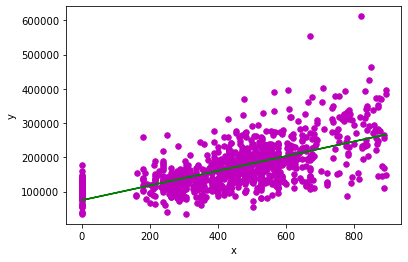

In [7]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x**2
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    

    return(b_0, b_1) 
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
    
    
def main(): 
    # observations 
    x = np.array(X_train["GarageArea"]) 
    y = np.array(y_train) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 
print(b)

In [27]:
# import packages
from sklearn.linear_model import LinearRegression 

# Code starts here

# instantiate linear model
linreg = LinearRegression()
y_train=np.log(y_train)

# fit model on training data

linreg.fit(X_train, y_train)
# predict on test features
y_pred = linreg.predict(X_test)


# Evaluation : Mean Absolute Error

In [28]:
from sklearn.metrics import mean_absolute_error

# Code starts here
y_pred=np.exp(y_pred)

# MAE calculation
mae = mean_absolute_error(y_test, y_pred)
print(mae)

# Code ends here

187802.02278565965


# Evaluation : Root Mean Squared Error

RMSE severely punishes large differences in prediction. This is the reason why RMSE is powerful as compared to Absolute Error.

In [29]:
from sklearn.metrics import mean_squared_error
import
y_pred=np.exp(y_pred)

# MAE calculation
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


205598.2026869498


# Evaluation : R squarem

 R-squared tells you how well your model fits the data points whereas Adjusted R-squared tells you how important is a particular feature to your model.

In [31]:
from sklearn.metrics import r2_score
y_pred=np.exp(y_pred)
rsqaured = r2_score(y_test, y_pred)

# The Lego Collector's Dilemma

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
path="lego_final.csv"
df=pd.read_csv(path)
df.head(5)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20


In [36]:
df.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')

In [43]:
X=df.loc[:,['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'] ]

In [44]:
y=df.iloc[:,1]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state = 6)


# Predictor Check!

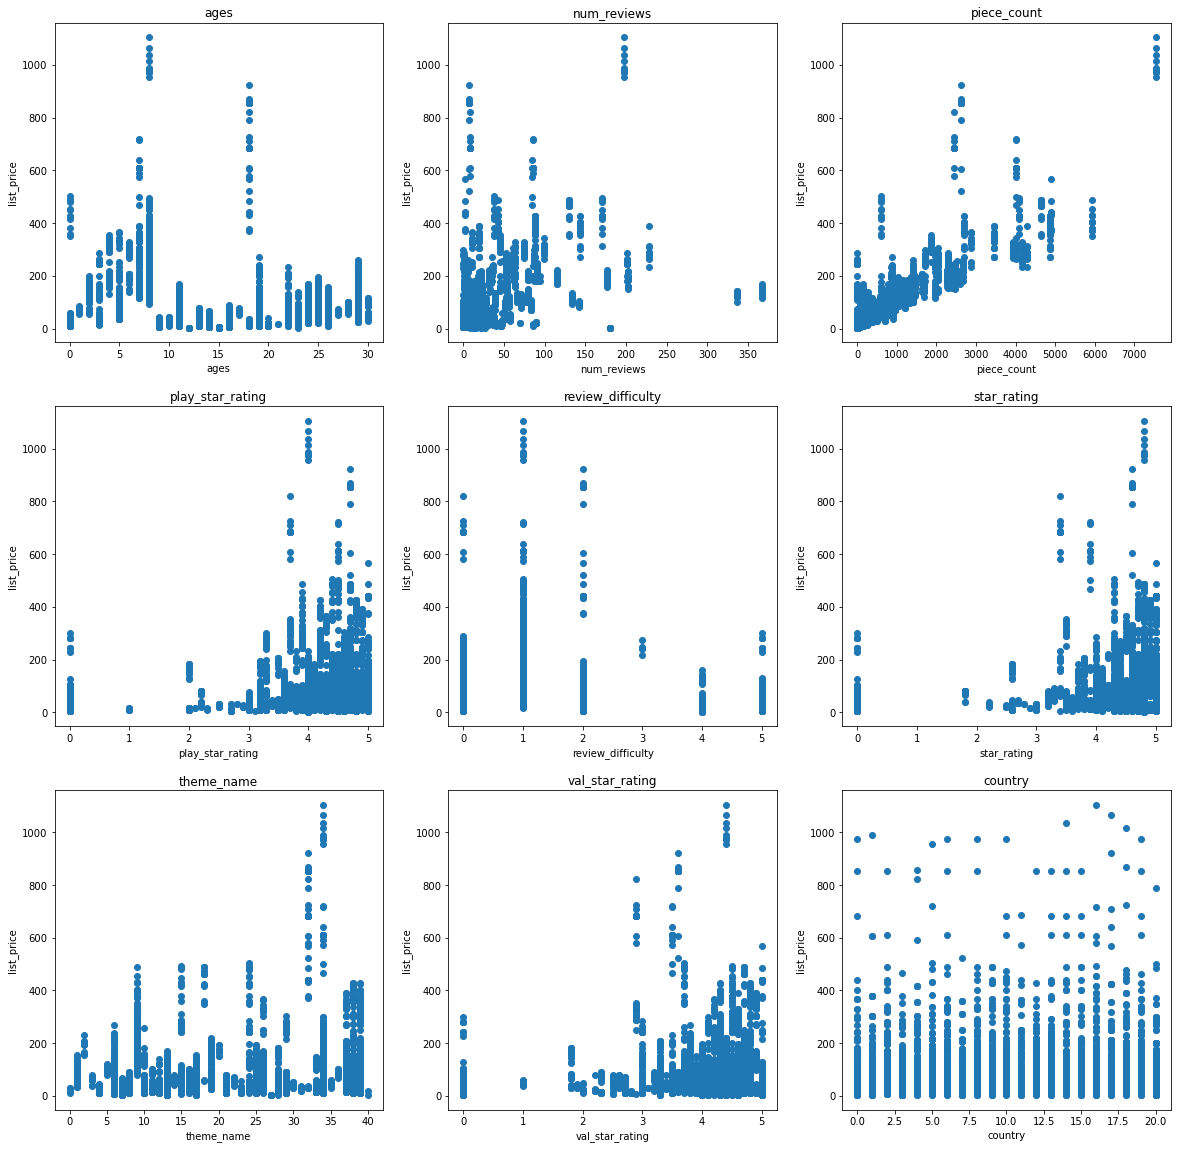

In [48]:
       
cols = X_train.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3): 
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(X_train[col],y_train)
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('list_price')
        

In [49]:
# corr code
corr = X_train.corr()
print(corr)

                       ages  num_reviews  piece_count  play_star_rating  \
ages               1.000000    -0.160969    -0.090685          0.232847   
num_reviews       -0.160969     1.000000     0.542924          0.151801   
piece_count       -0.090685     0.542924     1.000000          0.174411   
play_star_rating   0.232847     0.151801     0.174411          1.000000   
review_difficulty -0.239683    -0.196846    -0.312239         -0.670508   
star_rating        0.102633     0.160762     0.180903          0.902573   
theme_name         0.476178     0.012342     0.173318          0.151078   
val_star_rating    0.116349     0.172431     0.192863          0.921824   
country           -0.001526     0.001953     0.002506         -0.000958   

                   review_difficulty  star_rating  theme_name  \
ages                       -0.239683     0.102633    0.476178   
num_reviews                -0.196846     0.160762    0.012342   
piece_count                -0.312239     0.180903    0

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Instantiate linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred =regressor.predict(X_test)

# Calculate mse
mse = mean_squared_error(y_test, y_pred)

# print mse
print(mse)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)

#print r2
print(r2)

1983.9493990396782
0.7878489841102756


# Will You Choose Lasso or Ridge with the Holdout Method?

In [1]:
# # import packages
# from sklearn.model_selection import train_test_split

# # split into training and validation
# train_feat, test_feat, train_tar, test_tar = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # Code starts here

# # initiate lasso and ridge
# l1=Lasso()
# l2=Ridge()
# # fit on training
# l1.fit(train_feat,train_tar)
# l2.fit(train_feat,train_tar)

# # make predictions and calculate RMSE on validation data

# pred_l1=l1.predict(test_feat)
# pred_l2=l2.predict(test_feat)

# # select best model
# rmse_l1=np.sqrt(mean_squared_error(test_tar,pred_l1))
# rmse_l2=np.sqrt(mean_squared_error(test_tar,pred_l2))
# selected_model = l1 if rmse_l1 < rmse_l2 else l2

# # make prediction on test data and calculate RMSE
# selected_model_pred=selected_model.predict(X_test)
# rmse_selected_model_pred=np.sqrt(mean_squared_error(y_test,selected_model_pred))


# # Code ends here

# Use K-Fold |Cross Validation for Model Selection

In [2]:
# # import packages
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import cross_val_score
# scorer = make_scorer(mean_squared_error, greater_is_better = False)

# # Code starts here

# # instantiate L1 and L2

# # cross validation with L1
# L1=Lasso()
# rmse_L1=-np.mean(cross_val_score(L1,X_train,y_train,scoring=scorer,cv=10))


# # cross validation with L2
# L2=Ridge()
# rmse_L2=-np.mean(cross_val_score(L2,X_train,y_train,scoring=scorer,cv=10))

# # select best model

# Model = L1 if rmse_L1<rmse_L2 else L2
# # calculate RMSE on test data
# Model.fit(X_train,y_train)
# Pred=Model.predict(X_test)
# Error=np.sqrt(mean_squared_error(y_test,Pred))

# # Code ends here

# Select the Best Model by Cross-Validation Using Grid Search

In [3]:
# # import packages
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import warnings
# warnings.filterwarnings('ignore')

# # regularization parameters for grid search
# ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
# lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# # Code starts here

# # instantiate lasso and ridge models
# lasso_model=Lasso()
# ridge_model=Ridge()
# # grid search on lasso and ridge
# ridge_grid=GridSearchCV(ridge_model,param_grid=dict(alpha=ridge_lambdas))
# ridge_grid.fit(X_train,y_train)

# lasso_grid=GridSearchCV(lasso_model,param_grid=dict(alpha=lasso_lambdas))
# lasso_grid.fit(X_train,y_train)

# # make predictions 
# lasso_pred=lasso_grid.predict(X_test)
# ridge_pred=ridge_grid.predict(X_test)

# lasso_rmse=np.sqrt(mean_squared_error(y_test,lasso_pred))
# ridge_rmse=np.sqrt(mean_squared_error(y_test,ridge_pred))

# # print out which is better

# best_model='LASSO' if lasso_rmse<ridge_rmse else 'RIDGE'

# print(best_model)
# # Code ends here